“Analysis of daily habits and their impact on obesity rates”

In [2]:
# import dependencies 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# import csv
data = pd.read_csv("../Resources/cleaned_obesity_dataout.csv")

In [3]:
# Display DataFrame
data.head()

,Age,Gender,Height(in),Weight(lbs),Frequency of vegetable consumption,Number of main meals,Family history of obesity,Physical activity frequency,Consumption of food between meals,Transportation method,Obesity level,BMI
0,21.0,Female,63.76,141.06,2.0,3.0,yes,0.0,1,Public_Transportation,Normal_Weight,24.39
1,21.0,Female,59.83,123.42,3.0,3.0,yes,3.0,1,Public_Transportation,Normal_Weight,24.24
2,23.0,Male,70.85,169.71,2.0,3.0,yes,2.0,1,Public_Transportation,Normal_Weight,23.77
3,27.0,Male,70.85,191.75,3.0,3.0,no,2.0,1,Walking,Overweight_Level_I,26.85
4,22.0,Male,70.06,197.92,2.0,1.0,no,0.0,1,Public_Transportation,Overweight_Level_II,28.35


In [4]:
# Find frequency of vegtable consumption and group categories 
# Filter vegtable consumption count to include on 1, 2, or 3
veg_count = data[data["Frequency of vegetable consumption"].isin([1, 2, 3])]

# Calculate the frequency counts for the filtered data
veg_freq_count = veg_count["Frequency of vegetable consumption"].value_counts().sort_index()
veg_freq_count

Frequency of vegetable consumption
1.0     33
2.0    600
3.0    652
Name: count, dtype: int64

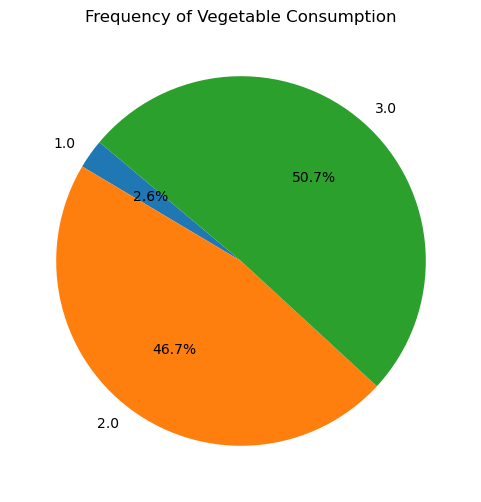

In [5]:
# Plot Pie Graph for Vegetable Consumption
plt.figure(figsize=(6, 6))
plt.pie(veg_freq_count, labels=veg_freq_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Frequency of Vegetable Consumption")
plt.show()

In [6]:
# Find the number of main meals frquency and group categories 
meal_count = data["Number of main meals"].value_counts()

# Define main categories
main_categories = [1, 3, 4]

# Filter main categories and define
main_meal_count = meal_count[meal_count.index.isin(main_categories)]

# Filter all other meal counts and create an others category 
other_meal_count = meal_count[~meal_count.index.isin(main_categories)].sum()

# Add the others category to the main counts 
main_meal_count["Other"] = other_meal_count
main_meal_count

Number of main meals
3.0      1203
1.0       199
4.0        69
Other     640
Name: count, dtype: int64

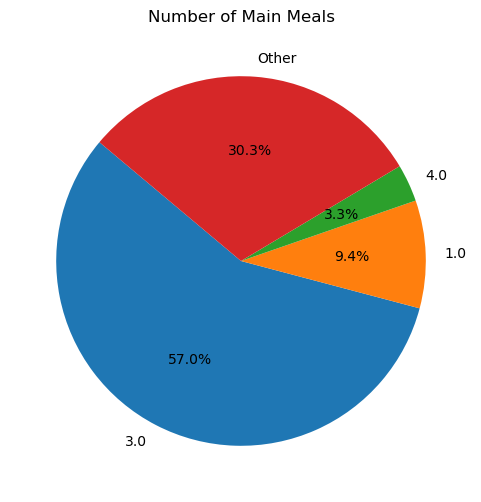

In [7]:
# Plot Pie Graph for Number of Main Meals 
plt.figure(figsize=(6, 6))
plt.pie(main_meal_count, labels=main_meal_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Number of Main Meals")
plt.show()

In [8]:
# Find the physical activity frequency and group categories 
# Filter "Physical activity frequency" to include only 0, 1, 2, or 3
physical_count = data[data["Physical activity frequency"].isin([0, 1, 2, 3])]

# Calculate the frequency counts for the filtered data
physical_freq_count = physical_count["Physical activity frequency"].value_counts().sort_index()
physical_freq_count

Physical activity frequency
0.0    411
1.0    234
2.0    183
3.0     75
Name: count, dtype: int64

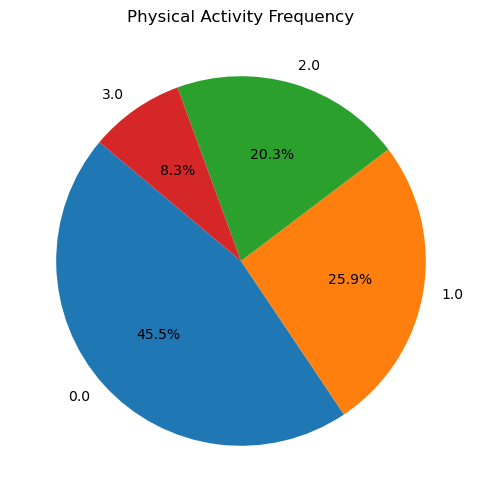

In [9]:
# Plot Pie Graph for Physical Activity Frequency
plt.figure(figsize=(6, 6))
plt.pie(physical_freq_count, labels=physical_freq_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Physical Activity Frequency")
plt.show()

In [10]:
# Find the frequency of consumption between meals and group categories 
between_count = data["Consumption of food between meals"].value_counts().sort_index()
between_count

Consumption of food between meals
0      51
1    1765
2     242
3      53
Name: count, dtype: int64

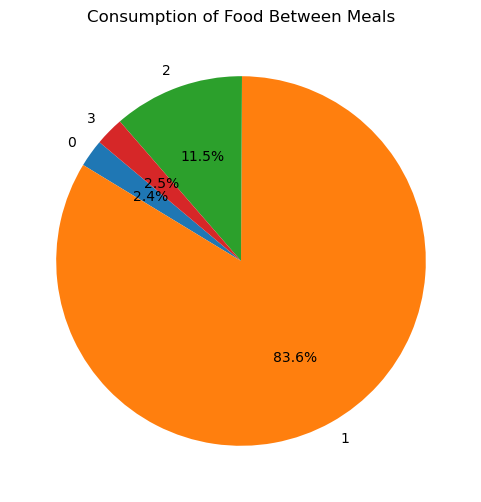

In [11]:
# Plot Pie Graph for Consumption of Food Between Meals
plt.figure(figsize=(6, 6))
plt.pie(between_count, labels=between_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Consumption of Food Between Meals")
plt.show()

In [12]:
# Export each chart's frequency data to JSON files
veg_freq_count.to_json('veg_count.json')
main_meal_count.to_json('meal_count.json')
physical_freq_count.to_json('physical_count.json')
between_count.to_json('between_count.json')